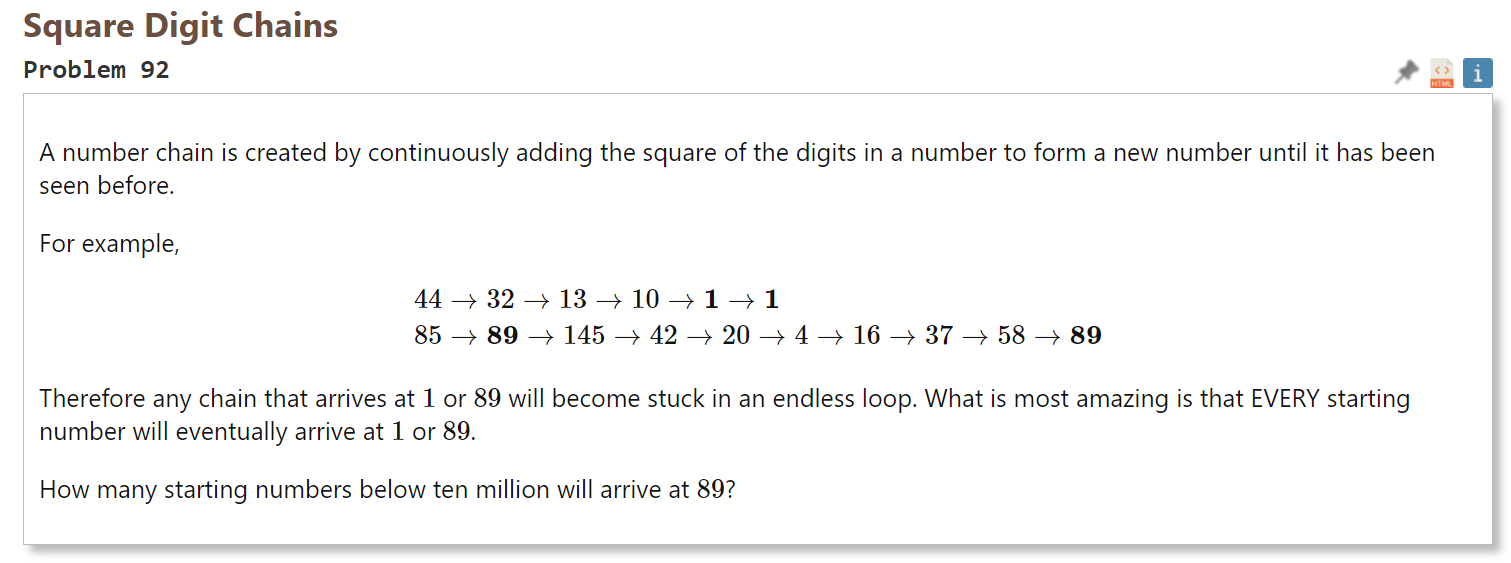

In [37]:
def find_next(num):
    new = 0
    for dig in str(num):
        new+=int(dig)**2
    return new

assert find_next(89) == 145
assert find_next(20) == 4

In [38]:
def core_loop(core_num):
    chain = [core_num]
    new = core_num
    while True:
        new = find_next(new)
        if new in chain:
            return chain
        chain.append(new)

assert core_loop(89) == [89, 145, 42, 20, 4, 16, 37, 58]

In [39]:
def loop(num, seen, core_loop):
    chain = [num]
    new = num
    while True:
        new = find_next(new)
        if new in core_loop:
            return seen + chain, core_loop + chain
        if new in seen or new in chain:
            return seen + chain, core_loop
        chain.append(new)

In [40]:
def answer_store(upper, core_num):
    core_chain = core_loop(core_num)
    seen = []
    for num in range(1, upper):
        if num in seen or num in core_chain:
            continue
        seen, core_chain = loop(num, seen, core_chain)
    return len(core_chain)

In [42]:
def loop_ends_in_core(num):
    new = num
    while True:
        if new == 89:
            return True
        elif new == 1:
            return False
        new = find_next(new)

assert loop_ends_in_core(42) == True
assert loop_ends_in_core(100) == False

In [50]:
def answer_calc(upper):
    count = 0
    for num in range(1, upper):
        if loop_ends_in_core(num):
            count += 1
    return count

In [51]:
answer_store(10**4, 89) == answer_calc(10**4)

True

In [45]:
%%timeit
ans = answer_store(10**4, 89)

1.09 s ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%%timeit
ans = answer_calc(10**4)

63.8 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
answer_calc(10**7)

8581146